In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Home = pd.read_csv('Datasets/train.csv')
##Home.dtypes

In [3]:
Home.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
Home.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
##Home.isnull().sum() >0

In [6]:
##Home.info()

In [7]:
def find_null_values():
    Null_Values = Home.isnull().sum().sort_values(ascending=False)
    Null_Values = Null_Values[Null_Values > 0]
    print ('Total number of records:', Home.shape[0])
    print ('Total No of columns with null values:', Null_Values.shape[0])
    print (Null_Values)
        
find_null_values()

Total number of records: 1460
Total No of columns with null values: 19
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [8]:
## let's work on one - by -one 
def find_colums(df, search):
    match = [c for c in Home.columns if search.lower() in c.lower()]
    return match

In [9]:
find_colums(Home,"Pool")

['PoolArea', 'PoolQC']

In [10]:
Home.query('PoolArea !=0 and PoolQC != PoolQC')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [11]:
Home.groupby('PoolArea').PoolQC.count()

PoolArea
0      0
480    1
512    1
519    1
555    1
576    1
648    1
738    1
Name: PoolQC, dtype: int64

In [13]:
Home.query('PoolArea ==0').shape

(1453, 81)

In [14]:
Pool_Index= Home.query('PoolArea ==0').index

In [15]:
Pool_Index.shape

(1453,)

In [16]:
for i in Pool_Index:
     Home.loc[i,'PoolQC'] = "None"

In [17]:
find_null_values() ### PoolQC is clear

Total number of records: 1460
Total No of columns with null values: 18
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageQual        81
GarageCond        81
GarageFinish      81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [18]:
Home.query('PoolArea == 0').head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,None,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,None,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,None,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,None,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,None,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
### Working on Garage STUFF
Home.filter(like='Garage', axis=1).head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [20]:
Home.query('GarageCars == 0')[['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond']].shape

(81, 6)

In [21]:
Home['GarageCars'].value_counts() #### Seems if GarageCars =0 then Null for rest of the Gragae Stuff (GarageType        81
                                ##  GarageQual        81
                                  ##  GarageCond        81
                                   ## GarageFinish      81
                                    ### GarageYrBlt       81)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [22]:
#### Get the index's to replace the data 
Garage_Index=Home.query('GarageCars == 0')[['GarageType','GarageQual','GarageCond','GarageFinish','GarageYrBlt']].index

for i in Garage_Index:
    Home.loc[i,['GarageType','GarageQual','GarageCond','GarageFinish','GarageYrBlt']] = "None" 

In [23]:
find_null_values() ###Garage stuff is cleared

Total number of records: 1460
Total No of columns with null values: 13
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64


In [24]:
### Validating the data
Home.query('GarageCars == 0')[['GarageType','GarageQual','GarageCond','GarageFinish','GarageYrBlt','GarageCars']].head()

,GarageType,GarageQual,GarageCond,GarageFinish,GarageYrBlt,GarageCars
39,None,None,None,None,None,0
48,None,None,None,None,None,0
78,None,None,None,None,None,0
88,None,None,None,None,None,0
89,None,None,None,None,None,0


In [25]:
Bsmt_Index= Home.query('BsmtFinType2 != BsmtFinType2 and BsmtExposure != BsmtExposure')[['BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1']].index

for i in Bsmt_Index:
    Home.loc[i,['BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1']] = "None" 

In [26]:
find_null_values() ###Bsmt stuff is cleared

Total number of records: 1460
Total No of columns with null values: 10
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
MasVnrArea         8
MasVnrType         8
BsmtFinType2       1
Electrical         1
BsmtExposure       1
dtype: int64


In [27]:
Home['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [28]:
### Replace defult values 

def replace_with(df, col, fill_with):
    idx = df[df[col].isnull()].index
    df.loc[idx, col] = fill_with


In [29]:
replace_with(Home,'Alley','None')
replace_with(Home,'MiscFeature','None')
replace_with(Home,'Fence','None')


In [30]:
find_null_values() ###Alley & MiscFeature stuff is cleared

Total number of records: 1460
Total No of columns with null values: 7
FireplaceQu     690
LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
BsmtFinType2      1
BsmtExposure      1
dtype: int64


In [31]:
Home.filter(like='Fire', axis=1).head(5)

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA


In [32]:
Home.groupby('Fireplaces').FireplaceQu.count()

Fireplaces
0      0
1    650
2    115
3      5
Name: FireplaceQu, dtype: int64

In [33]:
Home.query('Fireplaces ==0')['FireplaceQu'].isnull().shape

(690,)

In [34]:
replace_with(Home,'FireplaceQu','None')

In [35]:
find_null_values() ### FireplaceQu stuff is cleared

Total number of records: 1460
Total No of columns with null values: 6
LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
BsmtFinType2      1
BsmtExposure      1
dtype: int64


In [36]:
Home.filter(like='Lot',axis=1).head(5)

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2


In [37]:
Lot_list=Home.filter(like='Lot',axis=1)
Lot_list.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig'], dtype='object')

In [38]:
Home.query('LotFrontage !=LotFrontage')[list(Lot_list)].isnull().shape

(259, 4)

In [39]:
Home.groupby('LotShape').LotArea.count()

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: LotArea, dtype: int64

In [40]:
Home.groupby('LotShape').LotFrontage.agg(np.mean)

LotShape
IR1     76.094637
IR2     76.500000
IR3    138.428571
Reg     67.038778
Name: LotFrontage, dtype: float64

In [41]:
LotShape_IR1=Home.query('LotFrontage != LotFrontage and LotShape=="IR1"').isnull()['LotFrontage'].index
LotShape_IR2=Home.query('LotFrontage != LotFrontage and LotShape=="IR2"').isnull()['LotFrontage'].index

In [42]:
LotShape_IR1.shape,LotShape_IR2.shape

((167,), (15,))

In [43]:
for i in LotShape_IR1:
    Home.loc[i,'LotFrontage'] = 76
   
for i in LotShape_IR2:
    Home.loc[i,'LotFrontage'] = 76 

In [44]:
find_null_values() ### FireplaceQu stuff is cleared

Total number of records: 1460
Total No of columns with null values: 6
LotFrontage     77
MasVnrType       8
MasVnrArea       8
Electrical       1
BsmtFinType2     1
BsmtExposure     1
dtype: int64


In [45]:
LotShape_IR3=Home.query('LotFrontage != LotFrontage and LotShape=="IR3"').isnull()['LotFrontage'].index
LotShape_IR4=Home.query('LotFrontage != LotFrontage and LotShape=="Reg"').isnull()['LotFrontage'].index

In [46]:
for i in LotShape_IR3:
    Home.loc[i,'LotFrontage'] = 138
   
for i in LotShape_IR4:
    Home.loc[i,'LotFrontage'] = 67 

In [47]:
find_null_values() ### LotShape stuff is cleared

Total number of records: 1460
Total No of columns with null values: 5
MasVnrType      8
MasVnrArea      8
Electrical      1
BsmtFinType2    1
BsmtExposure    1
dtype: int64


In [48]:
Home.filter(like='Mas').head(5) ### By looking at the data MasVnrArea is 0 the type equal to None

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0


In [49]:
Mas_index= Home.query('MasVnrType != MasVnrType').index
Mas_index.shape

(8,)

In [50]:
for i in Mas_index:
    print (i)
    Home.loc[i,'MasVnrType'] = 'None'

234
529
650
936
973
977
1243
1278


In [51]:
Home.query('MasVnrType != MasVnrType').index

Int64Index([], dtype='int64')

In [52]:
for i in Mas_index:
    print (i)
    Home.loc[i,'MasVnrArea'] = 0

234
529
650
936
973
977
1243
1278


In [53]:
Home['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [54]:
Home.iloc[234][['MasVnrType','MasVnrArea']]

MasVnrType    None
MasVnrArea       0
Name: 234, dtype: object

In [55]:
find_null_values() ### Mas stuff is cleared

Total number of records: 1460
Total No of columns with null values: 3
Electrical      1
BsmtFinType2    1
BsmtExposure    1
dtype: int64


In [56]:
Home.query('MasVnrType != MasVnrType')[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea


In [57]:
Home.query('Electrical != Electrical')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2008,WD,Normal,167500


In [58]:
Home.iloc[1379].head(5)

Id             1380
MSSubClass       80
MSZoning         RL
LotFrontage      73
LotArea        9735
Name: 1379, dtype: object

In [59]:
find_null_values() ### Mas stuff is cleared

Total number of records: 1460
Total No of columns with null values: 3
Electrical      1
BsmtFinType2    1
BsmtExposure    1
dtype: int64


In [60]:
Home.dtypes[['Electrical','BsmtFinType2','BsmtExposure']]

Electrical      object
BsmtFinType2    object
BsmtExposure    object
dtype: object

In [61]:
replace_with(Home,'Electrical','None')
replace_with(Home,'BsmtFinType2','None')
replace_with(Home,'BsmtExposure','None')

In [62]:
find_null_values() ### Cool....no more missing values

Total number of records: 1460
Total No of columns with null values: 0
Series([], dtype: int64)


In [64]:
Home.to_csv("Datasets/House_data_cleaned.csv", index = False)

In [65]:
df = pd.read_csv('Datasets/House_data_cleaned.csv')
df.shape

(1460, 81)

In [66]:
df=df.drop('Id', axis=1)

In [67]:
df.dtypes.value_counts()

object     44
int64      34
float64     2
dtype: int64

In [68]:
df.select_dtypes(include='float64').head(2) ### i dont see any decimal values so converting them to int64

,LotFrontage,MasVnrArea
0,65.0,196.0
1,80.0,0.0


In [69]:
df['LotFrontage']=df.LotArea.astype('int64')
df['MasVnrArea']=df.MasVnrArea.astype('int64')

In [70]:
df.dtypes.value_counts()

object    44
int64     36
dtype: int64

In [71]:
#### Working on EDA part to remove some of the features
Int_values = df.select_dtypes(include='int64')
Cat_Values= df.select_dtypes(include='object')

In [72]:
### Checking the co-relations between them
target = Int_values['SalePrice']
source = Int_values.loc[:, Int_values.columns != 'SalePrice']

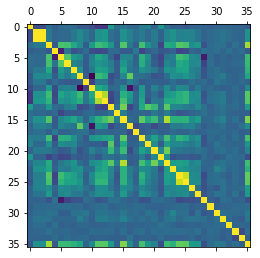

In [73]:
plt.matshow(Int_values.corr())

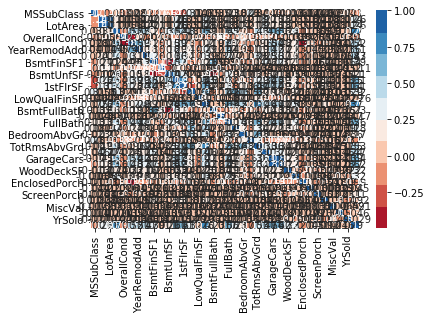

In [74]:
sns.heatmap(Int_values.corr(), cmap=sns.color_palette("RdBu", 10), annot=True)

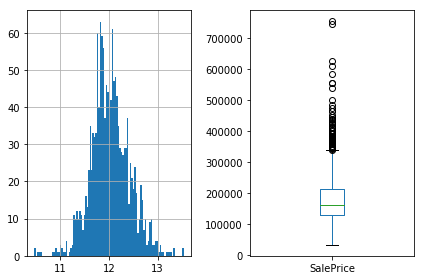

In [75]:
plt.subplot(1, 2, 1)
np.log(df.SalePrice).hist(bins = 100)
plt.subplot(1, 2, 2)
df.SalePrice.plot.box()
plt.tight_layout()

In [76]:
### Indentify the outlier

for i in range(0,100,10):
    var =df["SalePrice"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 34900
10 percentile value is 106500
20 percentile value is 124000
30 percentile value is 135500
40 percentile value is 147000
50 percentile value is 163000
60 percentile value is 179400
70 percentile value is 198500
80 percentile value is 230000
90 percentile value is 278000
100 percentile value is  755000


In [77]:
for i in range(90,100,1):
    var =df["SalePrice"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 278000
91 percentile value is 285000
92 percentile value is 297000
93 percentile value is 311500
94 percentile value is 318061
95 percentile value is 328000
96 percentile value is 345000
97 percentile value is 375000
98 percentile value is 395000
99 percentile value is 446261
100 percentile value is  755000


In [78]:
##frame_with_durations_modified=new_frame[(new_frame.trip_times>1) & (new_frame.trip_times<720)] 

df_new= df[(df.SalePrice >1) & (df.SalePrice<=446261)] 

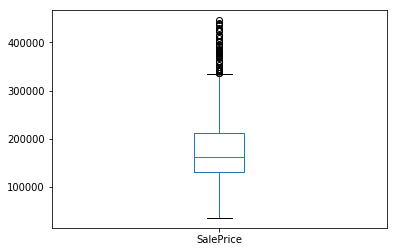

In [79]:
df_new.SalePrice.plot.box()
plt.show()

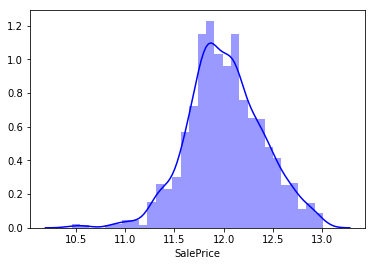

In [80]:
sns.distplot(np.log(df_new.SalePrice), color='blue' , vertical=False)

In [81]:
from  scipy.stats.stats import ttest_ind
from  scipy.stats.stats import ttest_1samp

In [82]:
ttest_ind(df_new.SalePrice,df_new.LotFrontage)

Ttest_indResult(statistic=89.79944423928035, pvalue=0.0)

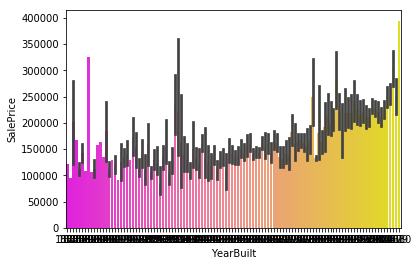

In [83]:
sns.barplot(x=df_new.YearBuilt, y=df_new.SalePrice, data=df_new, palette='spring')

In [84]:
df_new.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.141151,-0.141151,0.039744,-0.061964,0.031995,0.043593,0.030607,-0.063468,-0.064634,...,-0.012810,-0.004439,-0.012894,-0.044158,-0.028155,0.007998,-7.897532e-03,-0.014725,-0.020312,-0.085239
LotFrontage,-0.141151,1.000000,1.000000,0.089340,-0.004818,0.008506,0.006835,0.079680,0.205854,0.114193,...,0.160039,0.080700,-0.015264,0.021695,0.027306,0.079446,3.926034e-02,0.003257,-0.015853,0.253024
LotArea,-0.141151,1.000000,1.000000,0.089340,-0.004818,0.008506,0.006835,0.079680,0.205854,0.114193,...,0.160039,0.080700,-0.015264,0.021695,0.027306,0.079446,3.926034e-02,0.003257,-0.015853,0.253024
OverallQual,0.039744,0.089340,0.089340,1.000000,-0.091582,0.576217,0.548880,0.383921,0.212155,-0.060839,...,0.229469,0.292409,-0.108790,0.034195,0.045042,0.044094,-3.024910e-02,0.082848,-0.026061,0.797417
OverallCond,-0.061964,-0.004818,-0.004818,-0.091582,1.000000,-0.370417,0.077660,-0.123320,-0.038373,0.041197,...,0.001151,-0.035555,0.070026,0.025396,0.043869,0.003012,6.891651e-02,-0.003948,0.048363,-0.077694
YearBuilt,0.031995,0.008506,0.008506,0.576217,-0.370417,1.000000,0.591160,0.305638,0.238925,-0.050206,...,0.219925,0.188445,-0.387675,0.032522,-0.044831,-0.002525,-3.395701e-02,0.016181,-0.018711,0.556850
YearRemodAdd,0.043593,0.006835,0.006835,0.548880,0.077660,0.591160,1.000000,0.165875,0.117905,-0.068354,...,0.202990,0.220249,-0.191724,0.046513,-0.047364,0.001338,-9.558943e-03,0.025103,0.033797,0.535147
MasVnrArea,0.030607,0.079680,0.079680,0.383921,-0.123320,0.305638,0.165875,1.000000,0.237787,-0.070016,...,0.139673,0.117917,-0.107564,0.023096,0.063829,0.021203,-2.908111e-02,0.008570,-0.013872,0.429747
BsmtFinSF1,-0.063468,0.205854,0.205854,0.212155,-0.038373,0.238925,0.117905,0.237787,1.000000,-0.053903,...,0.197029,0.105718,-0.099368,0.029017,0.065150,0.117881,5.066697e-03,-0.010258,0.009998,0.358345
BsmtFinSF2,-0.064634,0.114193,0.114193,-0.060839,0.041197,-0.050206,-0.068354,-0.070016,-0.053903,1.000000,...,0.072967,0.005429,0.036523,-0.030159,0.088033,0.047775,4.915139e-03,-0.014422,0.030043,-0.010297


In [85]:
df_dummy = pd.get_dummies(df_new, drop_first=True)
df_dummy.shape

(1446, 357)

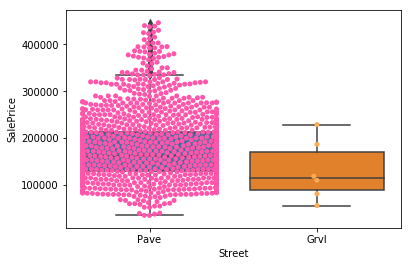

In [86]:
sns.boxplot(x='Street',y='SalePrice', data=df_new)
sns.swarmplot(x='Street',y='SalePrice', data=df_new, palette='spring')

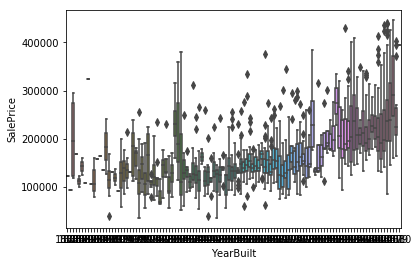

In [87]:
sns.boxplot(x=df_dummy.YearBuilt, y=df_dummy.SalePrice)

In [88]:
df_new.Street.value_counts()

Pave    1440
Grvl       6
Name: Street, dtype: int64

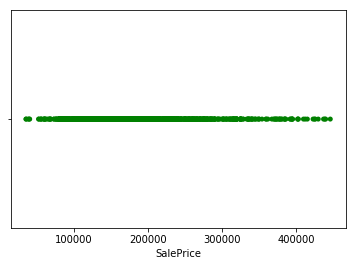

In [89]:
sns.stripplot(x='SalePrice', data=df_new, color='green')

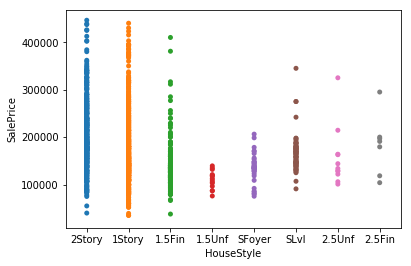

In [90]:
sns.stripplot(x='HouseStyle', y='SalePrice', data=df_new )

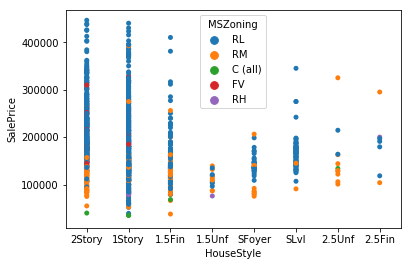

In [91]:
sns.stripplot(x='HouseStyle', y='SalePrice', data=df_new, hue='MSZoning' )

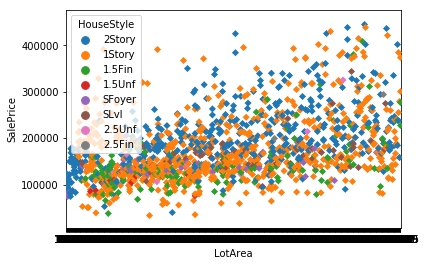

In [92]:
sns.stripplot(x='LotArea', y='SalePrice', data=df_new, hue='HouseStyle' , size=5, marker='D')

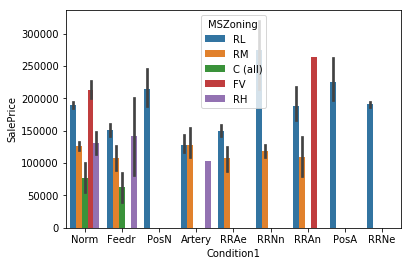

In [93]:
sns.barplot(x='Condition1', y='SalePrice', data= df_new, hue='MSZoning')

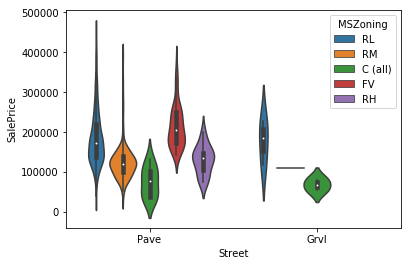

In [94]:
sns.violinplot(x='Street', y='SalePrice', data =df_new, hue='MSZoning')

In [95]:
df_dummy.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,9550,7,5,1915,1970,0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,1,0,0,0,1,0


In [96]:
target = df_dummy['SalePrice']
source = df_dummy.drop(['SalePrice'], axis=1)

In [97]:
target.shape,source.shape

((1446,), (1446, 356))

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [99]:
X_train, X_test, y_train, y_test = train_test_split(source, target, test_size = 0.3, random_state = 1)

In [100]:
model_lm = LinearRegression()
model_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
y_pred = model_lm.predict(X_test)

In [102]:
print ("Liner Regression r2 value ",r2_score(y_pred,y_test))

Liner Regression r2 value  0.7163485455693691


In [113]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [114]:
rmse(y_test,y_pred)

43090.14676885908

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
model_dt = DecisionTreeRegressor(max_depth=25,max_features=45,random_state=0, min_samples_leaf=4)
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=45,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [117]:
y_pred_tree = model_dt.predict(X_test)

In [118]:
print ("DecisionTreeRegressor r2 value ",r2_score(y_pred_tree,y_test))

DecisionTreeRegressor r2 value  0.7455900834977115


In [119]:
rmse(y_pred_tree,y_pred)

38557.36783956318

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [122]:
model_rf = RandomForestRegressor(n_estimators=600, max_depth=80,random_state = 123)
model_rf.fit(X_train_std,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [123]:
y_pred_tree_1 = model_rf.predict(X_test_std)

In [124]:
print ("RandomForestRegressor r2 value ",r2_score(y_pred_tree_1,y_test))

RandomForestRegressor r2 value  0.7396342973996117


In [125]:
rmse(y_pred_tree_1,y_pred) 

34008.13635574312

In [126]:
import xgboost as xgb 

In [135]:
model_xgb = xgb.XGBRegressor(max_depth=4)

In [136]:
model_xgb.fit(X_train_std,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [137]:
y_xgb = model_xgb.predict(X_test_std)

In [138]:
print ("XGBRegressor r2 value ",r2_score(y_xgb,y_test))

XGBRegressor r2 value  0.7802851745811272


In [139]:
rmse(y_xgb,y_pred)

32356.779710852737

In [141]:
r2_score(y_xgb,y_test)

0.7802851745811272

In [142]:
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [145]:
cv_scores = cross_validation.cross_val_score(model_xgb, X_train_std, y_train, cv=5, scoring="r2")

In [146]:
cv_scores, cv_scores.mean(), cv_scores.std()

(array([0.87285046, 0.90806639, 0.85913209, 0.89302349, 0.91816859]),
 0.8902482020900632,
 0.021797395609959695)

In [147]:
df.SalePrice.min(),df.SalePrice.max()

(34900, 755000)

In [148]:
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
                }
print(gb_grid_params)



gb_gs = xgb.XGBRegressor(max_depth=5)

model_xgb = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='r2',
                   verbose = 3, 
                   n_jobs=-1);
model_xgb.fit(X_train_std, y_train);

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8]}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.8s finished


In [149]:
model_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [150]:
model_xgb.best_score_

0.8902486175435638

In [151]:
model_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [152]:
xgb_final = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [153]:
xgb_final.fit(X_train_std, y_train);

In [154]:
y_final = xgb_final.predict(X_test_std)

In [155]:
r2_score(y_final,y_test)

0.782917185000374

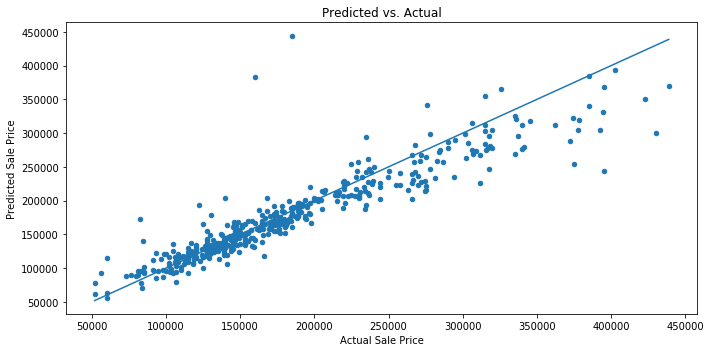

In [156]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_final, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()




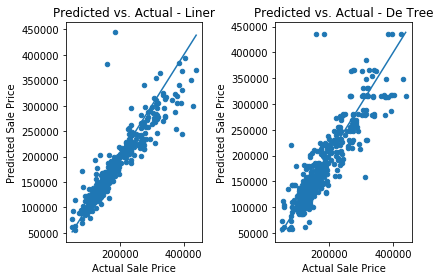

In [157]:
###Compare with others 

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_final, s=20)
plt.title('Predicted vs. Actual - Liner')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, s=20)
plt.title('Predicted vs. Actual - De Tree')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()


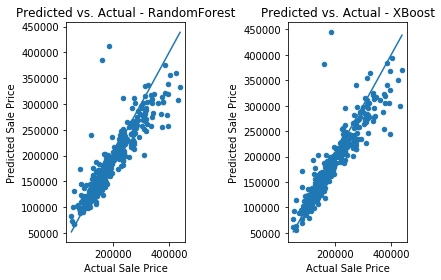

In [158]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree_1, s=20)
plt.title('Predicted vs. Actual - RandomForest')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_final, s=20)
plt.title('Predicted vs. Actual - XBoost')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()


In [159]:
print ("Liner Regression r2 value ",r2_score(y_pred,y_test))
print ("DecisionTreeRegressor r2 value ",r2_score(y_pred_tree,y_test))
print ("RandomForestRegressor r2 value ",r2_score(y_pred_tree_1,y_test))
print ("XGBRegressor r2 value ",r2_score(y_final,y_test))

Liner Regression r2 value  0.7163485455693654
DecisionTreeRegressor r2 value  0.7455900834977115
RandomForestRegressor r2 value  0.7396342973996117
XGBRegressor r2 value  0.782917185000374


In [172]:
Final=({'Linger': (r2_score(y_pred,y_test)),
       'DecisionTreeRegressor': r2_score(y_pred_tree,y_test),
       'RandomForestRegressor':r2_score(y_pred_tree_1,y_test),
        'XGBRegressor':          r2_score(y_final,y_test)})       

In [173]:
result = pd.Series.from_array(Final).sort_values()
result

Linger                   0.716349
RandomForestRegressor    0.739634
DecisionTreeRegressor    0.745590
XGBRegressor             0.782917
dtype: float64

Text(0.5,1,'Performance comparison of algorithms')

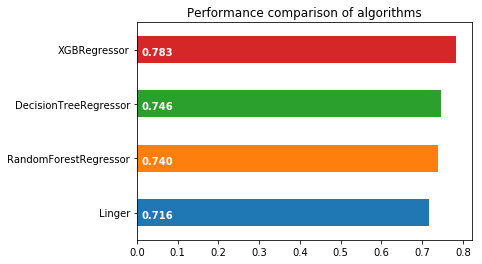

In [162]:
result = pd.Series.from_array(Final).sort_values()
result.plot.barh(width = 0.5)
plt.title("Performance comparison of algorithms")
for y, r2 in enumerate(result):
    plt.text(x = 0.01, y = y - 0.1,  s = "%.3f" % r2, fontweight='bold', color = "white")
plt.title("Performance comparison of algorithms")

In [163]:
%pwd

'C:\\Users\\Sudheer\\Practice'

In [164]:
import pickle
pickle.dump(model_lm, open('E:/Data_Science/Analytics_Path/Pikle_Files/model-lm.pkl', 'wb'))
pickle.dump(model_dt, open('E:/Data_Science/Analytics_Path/Pikle_Files/model-dt.pkl', 'wb'))
pickle.dump(model_rf, open('E:/Data_Science/Analytics_Path/Pikle_Files/model-rf.pkl', 'wb'))
pickle.dump(model_xgb, open('E:/Data_Science/Analytics_Path/Pikle_Files/model-xgb.pkl', 'wb'))
pickle.dump(scaler, open('E:/Data_Science/Analytics_Path/Pikle_Files/scaler.pkl', 'wb'))

In [165]:
outcome = pd.DataFrame({"actual": y_test,"pred": y_final}) 
outcome["diff"] = outcome.actual - outcome.pred

In [166]:
outcome.sample(10)

,actual,pred,diff
60,158000,169830.531250,-11830.531250
1403,282922,259008.875000,23913.125000
1095,176432,169433.750000,6998.250000
1018,160000,167351.296875,-7351.296875
771,102000,116784.367188,-14784.367188
849,187000,176727.062500,10272.937500
210,98000,97907.460938,92.539062
169,228000,235151.750000,-7151.750000
98,83000,77836.914062,5163.085938
714,130500,178073.328125,-47573.328125


In [167]:
xgb_final.feature_importances_

array([0.03259098, 0.09016839, 0.        , 0.04562738, 0.04291146,
       0.03747963, 0.03259098, 0.01683868, 0.04942966, 0.00434546,
       0.03041825, 0.03476372, 0.03585008, 0.02661597, 0.        ,
       0.05594786, 0.01249321, 0.00054318, 0.00271592, 0.00869093,
       0.00760456, 0.00108637, 0.00543183, 0.00597501, 0.00869093,
       0.0353069 , 0.01955459, 0.01466594, 0.00706138, 0.00054318,
       0.00597501, 0.0065182 , 0.00271592, 0.02498642, 0.01629549,
       0.        , 0.        , 0.00434546, 0.00271592, 0.        ,
       0.00054318, 0.00054318, 0.00054318, 0.        , 0.00380228,
       0.00162955, 0.00054318, 0.00217273, 0.        , 0.00217273,
       0.0032591 , 0.00217273, 0.00543183, 0.00271592, 0.00054318,
       0.        , 0.        , 0.00706138, 0.00271592, 0.00162955,
       0.0097773 , 0.00162955, 0.        , 0.00054318, 0.        ,
       0.        , 0.00108637, 0.        , 0.        , 0.00108637,
       0.00271592, 0.00108637, 0.        , 0.        , 0.     